# Portafolio: Ejercicios evaluables

#### Matemáticas para la Inteligencia Artificial

Alexandre Carulla Rodes

13/07/2025

En este documento se encuentra solamente el código desarrollado de los ejercicios evaluables.

In [2]:
import numpy as np
import time
import copy
import matplotlib.pyplot as plt

### Implementación de `determinante_recursivo` mediante la definición recursiva de Laplace.

In [4]:
def determinante_recursivo(A):
    """
    Cálculo del determinante de forma recursiva (Laplace).

    Entradas:
    - A: Matriz (array de Numpy) que se quiere calcular su determinante.

    Salidas:
    - det: Determinante de la matriz.
    """
    
    n = A.shape[0]

    # Caso base (matriz 1x1) cuyo resultado es su elemento
    if n == 1:
        return A[0, 0]
    
    det = 0
    # Se recorre cada índice de columna de la primera fila
    for j in range(n): 
        menor = np.delete(np.delete(A, 0, axis=0), j, axis=1) # Se construye el menor eliminando la primera fila y la columna j
        det += (-1) ** (1 + (j + 1)) * A[0, j] * determinante_recursivo(menor) # Se usa la definición de determinante con el método de Laplace con la primera fila
        
    return det

Comprobamos que el algoritmo funciona correctamente:

In [6]:
A = np.array([
    [2, 3, 1],
    [-2, 3, -3],
    [1, 3, 3]
])

print("Determinante:", determinante_recursivo(A))

Determinante: 36


Comprobamos que si la matriz es triangular entonces el determinante es el producto de los elementos diagonales:

In [8]:
B = np.array([
    [2, 3, 1],
    [0, 3, -3],
    [0, 0, -3]
])

print("Determinante:", determinante_recursivo(B))

Determinante: -18


Comprobamos que permutar dos filas cambia el signo del determinante:

In [10]:
C = np.array([
    [2, 3, 1],
    [0, 0, -3],
    [0, 3, -3]
])
D = np.array([
    [2, 3, 1],
    [0, 3, -3],
    [0, 0, -3]
])

print("Determinante:", determinante_recursivo(C))
print("Determinante:", determinante_recursivo(D))

Determinante: 18
Determinante: -18


### Implementación de `determinante_gauss` mediante el método de eliminación de Gauss con pivote parcial

In [12]:
def escalonar_gauss(A):
    """
    Escalona una matriz con el método de eliminación de Gauss con pivote parcial.

    Entradas:
    - A: Matriz (array de Numpy) que se quiere escalonar.

    Salidas:
    - M: Matriz escalonada (array de Numpy).
    - signo: Signo del número de intercambios de filas realizados (+1 un número par, -1 un número impar, 0 si la matriz es singular). Útil para el cálculo del determinante.
    """
    
    M = A.copy()
    n = M.shape[0]
    signo = 1

    # Se recorren las columnas de la matriz para realizar el escalonado
    for k in range(n):
        maximo = np.argmax(np.abs(M[k:, k])) + k # Se selecciona el pivote (máximo absoluto)

        # Se tiene en cuenta si la matriz es singular
        if np.isclose(M[maximo, k], 0):
            return M, 0 
            
        # Se produce el intercambio de filas según el pivote (si es necesario)
        if maximo != k:
            fila_temp = M[k].copy()
            M[k] = M[maximo]
            M[maximo] = fila_temp
            signo *= -1

        # Se producen los cálculos para las anulaciones debajo del pivote
        for i in range(k + 1, n):
            factor = M[i, k] / M[k, k]
            for j in range(k, n):
                M[i, j] -= factor * M[k, j]

    return M, signo

def determinante_gauss(A):
    """
    Cálculo del determinante con el método de eliminación de Gauss con pivote parcial.

    Entradas:
    - A: Matriz (array de Numpy) que se quiere calcular su determinante.

    Salidas:
    - det: Determinante de la matriz.
    """
    
    M_escalonada, signo = escalonar_gauss(A) # Se invoca el método de Gauss con pivote parcial para escalonar la matriz

    # Caso especial en el que la matriz es singular y el determinante es nulo
    if signo == 0: 
        return 0

    det = signo
    n = M_escalonada.shape[0]
    # Se recorren los elementos de la diagonal de la matriz para calcular el determinante
    for i in range(n):
        det *= M_escalonada[i, i]

    return det

In [13]:
E = np.array([
    [2, 3, 1],
    [1, 1, -3],
    [1, 3, -3]
])

print("Determinante:", determinante_gauss(E))

Determinante: 6


### Implementación de `compara_metodos` para hacer la comparación de diferentes métodos

In [15]:
def compara_metodos(min_n, max_n):
    """
    Cálculo de los tiempos de ejecución de 'determinante_recursivo', 'determinante_gauss' y 'np.linalg.det' para un rango de matrices aleatorias de unas determinadas dimensiones.

    Entradas:
    - min_n: Número de filas (o columnas) de la matriz más pequeña a evaluar.
    - max_n: Número de filas (o columnas) de la matriz más grande a evaluar.
    Salidas:
    - tiempos_rec: Lista de los tiempos de ejecución de 'determinante_recursivo' desde 'min_n' hasta 'max_n'.
    - tiempos_gauss: Lista de los tiempos de ejecución de 'determinante_gauss' desde 'min_n' hasta 'max_n'.
    - tiempos_numpy: Lista de los tiempos de ejecución de 'np.linalg.det' desde 'min_n' hasta 'max_n'.
    """
    
    tiempos_rec = []
    tiempos_gauss = []
    tiempos_numpy = []

    # Se recorren las dimensiones de las matrices que se quiere evaluar
    for n in range(min_n, max_n + 1):
        A = np.random.rand(n, n) # Se genera una matriz con valores aleatorios

        # Método recursivo
        inicio = time.perf_counter()
        determinante_recursivo(A)
        tiempo_rec = time.perf_counter() - inicio
        tiempos_rec.append(tiempo_rec)

        # Método con Gauss
        inicio = time.perf_counter()
        determinante_gauss(A)
        tiempo_gauss = time.perf_counter() - inicio
        tiempos_gauss.append(tiempo_gauss)

        # Método con Numpy
        inicio = time.perf_counter()
        np.linalg.det(A)
        tiempo_numpy = time.perf_counter() - inicio
        tiempos_numpy.append(tiempo_numpy)

    return tiempos_rec, tiempos_gauss, tiempos_numpy

Creación y representación de los tiempos con los diferentes métodos:

Tiempos con recursividad:  [0.00013780000153928995, 0.00010840001050382853, 0.0010186000145040452, 0.002657499979250133, 0.007925499987322837, 0.04650060000130907, 0.48997250001411885, 10.609053099993616, 109.45034949999535]
Tiempos con Gauss:  [0.00023850001161918044, 0.0008419000077992678, 0.0004474999732337892, 0.00032569997711107135, 0.0003913000109605491, 0.0002463000128045678, 0.0008842000388540328, 0.0011122000287286937, 0.0011248999508097768]
Tiempos con Numpy:  [0.0002701999619603157, 8.729996625334024e-05, 3.659998765215278e-05, 3.419996937736869e-05, 2.7500034775584936e-05, 3.220001235604286e-05, 5.859998054802418e-05, 7.98000255599618e-05, 5.740002961829305e-05]


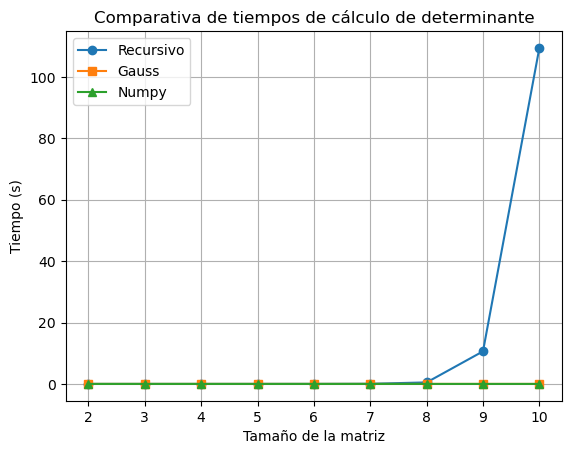

In [17]:
min_n, max_n = 2, 10
rec, gauss, numpy_times = compara_metodos(min_n, max_n)

print("Tiempos con recursividad: ", rec)
print("Tiempos con Gauss: ", gauss)
print("Tiempos con Numpy: ", numpy_times)

# Lista con desde el valor mínimo y máximo de dimensión de las matrices
ns = list(range(min_n, max_n + 1))

# Representación gráfica
plt.plot(ns, rec, marker='o', label='Recursivo')
plt.plot(ns, gauss, marker='s', label='Gauss')
plt.plot(ns, numpy_times, marker='^', label='Numpy')
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo (s)")
plt.title("Comparativa de tiempos de cálculo de determinante")
plt.legend()
plt.grid(True)
plt.show()

### Implementación de `gradiente_descendente` para realizar el método del descenso del gradiente

In [19]:
def gradiente_descendente(grad_f, x0, gamma, tol, maxit):
    """
    Método de descenso de gradiente para minimizar una función con el gradiente definido.

    Entradas:
    - grad_f: Función que recibe un vector 'x' y devuelve el gradiente de la función evaluado en 'x'.
    - x0: Punto inicial (array de Numpy).
    - gamma: Ratio de aprendizaje.
    - tol: Tolerancia para la norma del gradiente.
    - maxit: Número máximo de iteraciones.
    Salidas:
    - x: Punto resultante (array de Numpy) donde el gradiente es casi nulo (mínimo).
    """
    
    x = x0.copy()

    # Se itera en cada paso para actualizar la solución
    for i in range(int(maxit)):
        grad = grad_f(x)
        norm_grad = np.linalg.norm(grad)

        # Se analiza si se ha cruzado una determinada tolerancia
        if norm_grad < tol: 
            return x
        
        x = x - gamma * grad # Expresión del gradiente descendente
    return x

### Implementación del descenso del gradiente con una determinada función unidimensional

In [21]:
def f(x):
    """
    Cálculo del valor de una función en un punto.

    f(x) = 3x^4 + 4x^3 - 12x^2 + 7

    Entradas:
    - x: Punto (array de Numpy).

    Salidas:
    - value: Valor de la función en el punto.
    """    

    value = 3 * x[0]**4 + 4 * x[0]**3 - 12 * x[0]**2 + 7
    return value

def grad_f(x):
    """
    Cálculo del gradiente de una función en un punto.

    f(x) = 3x^4 + 4x^3 - 12x^2 + 7

    Entradas:
    - x: Punto (array de Numpy).

    Salidas:
    - grad: Vector (array de Numpy) gradiente en el punto.
    """
    
    grad_x = 12 * x[0]**3 + 12 * x[0]**2 - 24 * x[0]
    
    grad = np.array([grad_x])
    return grad

Ejecutamos el método del descenso del gradiente con diferentes configuraciones iniciales:

In [23]:
x0 = np.array([3]) # Punto inicial
gamma = 0.001 # Tasa de aprendizaje
tol = 1e-12 # Tolerancia
maxit = 1e5 # Número máximo de iteraciones

sol = gradiente_descendente(grad_f, x0, gamma, tol, maxit)
print("Solución encontrada:", sol)
print("Imagen de la solución encontrada:", f(sol))

Solución encontrada: [1.]
Imagen de la solución encontrada: 2.0


In [24]:
x0 = np.array([3]) # Punto inicial
gamma = 0.01 # Tasa de aprendizaje
tol = 1e-12 # Tolerancia
maxit = 1e5 # Número máximo de iteraciones

sol = gradiente_descendente(grad_f, x0, gamma, tol, maxit)
print("Solución encontrada:", sol)
print("Imagen de la solución encontrada:", f(sol))

Solución encontrada: [-2.]
Imagen de la solución encontrada: -24.999999999999996


In [25]:
x0 = np.array([3]) # Punto inicial
gamma = 0.1 # Tasa de aprendizaje
tol = 1e-12 # Tolerancia
maxit = 1e5 # Número máximo de iteraciones

sol = gradiente_descendente(grad_f, x0, gamma, tol, maxit)
print("Solución encontrada:", sol)
print("Imagen de la solución encontrada:", f(sol))

C:\Users\alexc\AppData\Local\Temp\ipykernel_1776\3096613117.py:30: RuntimeWarning: overflow encountered in scalar power
  grad_x = 12 * x[0]**3 + 12 * x[0]**2 - 24 * x[0]
C:\Users\alexc\AppData\Local\Temp\ipykernel_1776\3096613117.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  grad_x = 12 * x[0]**3 + 12 * x[0]**2 - 24 * x[0]


Solución encontrada: [nan]
Imagen de la solución encontrada: nan


In [26]:
x0 = np.array([0]) # Punto inicial
gamma = 0.001 # Tasa de aprendizaje
tol = 1e-12 # Tolerancia
maxit = 1e5 # Número máximo de iteraciones

sol = gradiente_descendente(grad_f, x0, gamma, tol, maxit)
print("Solución encontrada:", sol)
print("Imagen de la solución encontrada:", f(sol))

Solución encontrada: [0]
Imagen de la solución encontrada: 7


### Implementación del descenso del gradiente con una determinada función bidimensional

In [28]:
def g(x):
    """
    Cálculo del valor de una función en un punto.

    g(x, y) = x^2 + y^3 + 3xy + 1

    Entradas:
    - x: Punto (array de Numpy).

    Salidas:
    - value: Valor de la función en el punto.
    """    

    value = x[0]**2 + x[1]**3 + 3 * x[0] * x[1] + 1
    return value

def grad_g(x):
    """
    Cálculo del gradiente de una función en un punto.

    g(x, y) = x^2 + y^3 + 3xy + 1

    Entradas:
    - x: Punto (array de Numpy).

    Salidas:
    - grad: Vector (array de Numpy) gradiente en el punto.
    """
    
    grad_x = 2 * x[0] + 3 * x[1]
    grad_y = 3 * x[1]**2 + 3 * x[0]
    
    grad = np.array([grad_x, grad_y])
    return grad

Ejecutamos el método del descenso del gradiente con diferentes configuraciones iniciales:

In [30]:
x0 = np.array([-1, 1]) # Punto inicial
gamma = 0.01 # Tasa de aprendizaje
tol = 1e-12 # Tolerancia
maxit = 1e5 # Número máximo de iteraciones

sol = gradiente_descendente(grad_g, x0, gamma, tol, maxit)
print("Solución encontrada:", sol)
print("Imagen de la solución encontrada:", g(sol))

Solución encontrada: [-2.25  1.5 ]
Imagen de la solución encontrada: -0.6875


In [31]:
x0 = np.array([0, 0]) # Punto inicial
gamma = 0.01 # Tasa de aprendizaje
tol = 1e-12 # Tolerancia
maxit = 1e5 # Número máximo de iteraciones

sol = gradiente_descendente(grad_g, x0, gamma, tol, maxit)
print("Solución encontrada:", sol)
print("Imagen de la solución encontrada:", g(sol))

Solución encontrada: [0 0]
Imagen de la solución encontrada: 1
